In [181]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics
%matplotlib inline

In [182]:
# Question 1

dat = pd.read_csv("Q1.csv")
dat.head()

,ts,user_id,country_id,site_id
0,2019-02-01 00:01:24,LC36FC,TL6,N0OTG
1,2019-02-01 00:10:19,LC39B6,TL6,N0OTG
2,2019-02-01 00:21:50,LC3500,TL6,N0OTG
3,2019-02-01 00:22:50,LC374F,TL6,N0OTG
4,2019-02-01 00:23:44,LCC1C3,TL6,QGO3G


In [183]:
country_is_BDV = dat["country_id"]=="BDV"
dat_BDV = dat[country_is_BDV]
dat_BDV = dat_BDV[["user_id", "site_id"]]
dat_BDV.head()

,user_id,site_id
13,LC3C22,N0OTG
32,LC375A,5NPAU
87,LC392E,N0OTG
88,LC3FAE,5NPAU
94,LC3AFF,3POLC


In [184]:
dat_BDV_unique_user_id = dat_BDV.drop_duplicates()
dat_BDV_unique_user_id["site_id"].value_counts()

5NPAU    544
N0OTG     90
3POLC      2
Name: site_id, dtype: int64

In [185]:
dat_within_time_limit = dat[(dat['ts'] > '2019-02-03 00:00:00') & (dat['ts'] < '2019-02-04 23:59:59')]
dat_within_time_limit.head(10)

,ts,user_id,country_id,site_id
1049,2019-02-03 00:02:31,LC3C7E,TL6,3POLC
1050,2019-02-03 00:03:09,LC3C7E,TL6,3POLC
1051,2019-02-03 00:03:46,LC3C7E,TL6,3POLC
1052,2019-02-03 00:04:12,LC3C7E,TL6,3POLC
1053,2019-02-03 00:04:25,LC3C7E,TL6,3POLC
1054,2019-02-03 00:04:40,LC3C7E,TL6,3POLC
1055,2019-02-03 00:05:00,LC3C7E,TL6,3POLC
1056,2019-02-03 00:05:18,LC399D,BDV,N0OTG
1057,2019-02-03 00:05:47,LC31A0,XA7,N0OTG
1058,2019-02-03 00:06:47,LC3C7E,TL6,3POLC


In [186]:
g = dat_within_time_limit.groupby(['site_id', 'user_id']).count()
g[g['ts']>10]

ts  country_id
site_id user_id                
3POLC   LC3C7E   15          15
N0OTG   LC06C3   25          25
        LC3A59   26          26
        LC3C9D   17          17

In [187]:
dat_last_visit = dat.sort_values('ts').groupby(['user_id']).tail(1)
dat_last_visit.groupby(['site_id']).count()


,ts,user_id,country_id
site_id,,,
3POLC,28,28,28
5NPAU,992,992,992
EUZ/Q,1,1,1
GVOFK,42,42,42
JSUUP,1,1,1
N0OTG,561,561,561
QGO3G,289,289,289
RT9Z6,2,2,2


In [188]:
dat_first_visit = dat.sort_values('ts').groupby(['user_id']).head(1)
dat_first_visit

,ts,user_id,country_id,site_id
0,2019-02-01 00:01:24,LC36FC,TL6,N0OTG
1,2019-02-01 00:10:19,LC39B6,TL6,N0OTG
2,2019-02-01 00:21:50,LC3500,TL6,N0OTG
3,2019-02-01 00:22:50,LC374F,TL6,N0OTG
4,2019-02-01 00:23:44,LCC1C3,TL6,QGO3G
...,...,...,...,...
3542,2019-02-07 23:39:33,LC34C6,HVQ,GVOFK
3543,2019-02-07 23:41:25,LCC36A,TL6,N0OTG
3544,2019-02-07 23:42:35,LC34B8,TL6,QGO3G
3548,2019-02-07 23:56:57,LC3F13,TL6,QGO3G


In [189]:
frames = [dat_first_visit, dat_last_visit]
dat_first_and_last = pd.concat(frames)

dat_first_and_last_skim = dat_first_and_last[["user_id", "site_id"]]

dat_new = dat_first_and_last_skim.drop_duplicates(subset=None, keep="first", inplace=False)

In [190]:
len(dat_first_and_last_skim) - len(dat_new)

1670

In [191]:
# Question 2

dat_2 = pd.read_csv("Q2.csv", header=None)
dat_2.columns = ['A','B','C']
dat_2.head()

,A,B,C
0,0.490,-0.18,11.50
1,-1.410,-1.23,11.80
2,0.943,4.51,-3.24
3,3.570,5.07,-23.90
4,-1.700,6.91,-22.10


In [192]:
dat_2.describe()

,A,B,C
count,300.000000,300.000000,300.000000
mean,2.317009,2.013115,-41.564919
std,5.695248,2.998680,581.251021
min,-8.860000,-2.890000,-10000.000000
25%,-1.940000,-0.606250,-23.375000
50%,0.468500,1.935000,-3.090000
75%,7.042500,4.697500,16.300000
max,20.600000,7.000000,202.000000


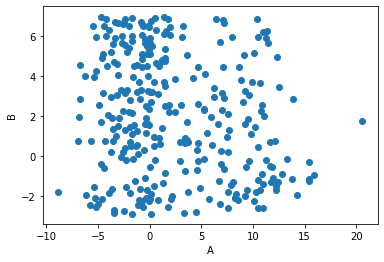

In [193]:
plt.scatter(dat_2['A'], dat_2['B'])
plt.xlabel("A")
plt.ylabel("B")
plt.show()

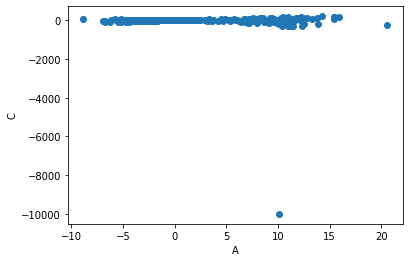

In [194]:
plt.scatter(dat_2['A'], dat_2['C'])
plt.xlabel("A")
plt.ylabel("C")
plt.show()

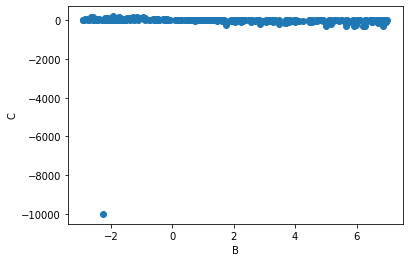

In [195]:
plt.scatter(dat_2['B'], dat_2['C'])
plt.xlabel("B")
plt.ylabel("C")
plt.show()

In [196]:
dat_2 = dat_2[dat_2.C !=-10000] # remove outlier

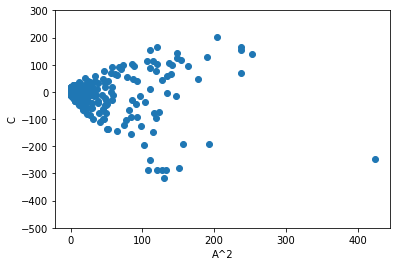

In [197]:
plt.scatter(dat_2['A']**2, dat_2['C'])
plt.ylim(-500, 300)
plt.xlabel("A^2")
plt.ylabel("C")
plt.show()

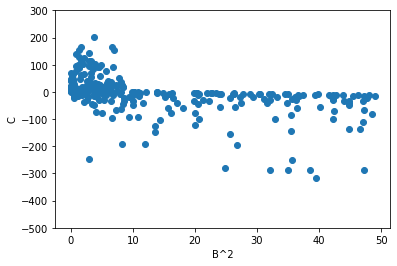

In [198]:
plt.scatter(dat_2['B']**2, dat_2['C'])
plt.ylim(-500, 300)
plt.xlabel("B^2")
plt.ylabel("C")
plt.show()

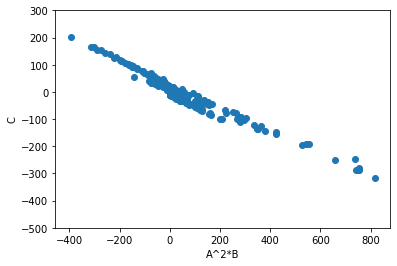

In [199]:
plt.scatter(dat_2['A']**2*dat_2['B'], dat_2['C'])
plt.ylim(-500, 300)
plt.xlabel("A^2*B")
plt.ylabel("C")
plt.show()

In [201]:
dat_2['A_squared'] = dat_2['A']**2
dat_2['B_squared'] = dat_2['B']**2
dat_2['A_squared_times_B'] = dat_2['A']**2*dat_2['B']

X = dat_2[['A','B', 'A_squared','B_squared', 'A_squared_times_B']]
y = dat_2['C']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model_1 = sm.OLS(y_train, X_train)
result_train = model_1.fit()
print(result_train.summary())

                                 OLS Regression Results                                
Dep. Variable:                      C   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              6461.
Date:                Fri, 21 Feb 2020   Prob (F-statistic):                   1.68e-248
Time:                        19:32:14   Log-Likelihood:                         -774.70
No. Observations:                 239   AIC:                                      1559.
Df Residuals:                     234   BIC:                                      1577.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

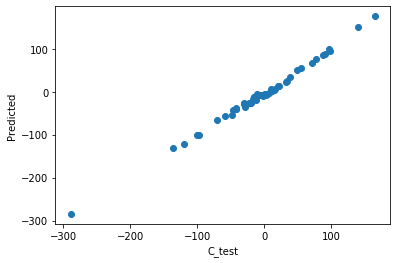

In [208]:
predicted = result_train.predict(X_test)
plt.scatter(y_test, predicted)
plt.xlabel("C_test")
plt.ylabel("Predicted")
plt.show()